#Customer Churn Prediction
- Author : Muhammad Adha

##Setup Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import pickle
from pathlib import Path

import warnings
warnings.filterwarnings('ignore')

##Load Data

In [ ]:
pd.set_option('display.max_columns',50)
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')
df_load.head(5)

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,202006,45557574145,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,202006,45366876421,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,202006,45779536532,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,202006,45923787906,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df_load.shape

(7113, 22)

## Column Descriptions:

---

* **`UpdatedAt`**: Periode of Data taken
* **`customerID`**: Customer ID
* **`gender`**: Whether the customer is a male or a female (Male, Female)
* **`SeniorCitizen`**: Whether the customer is a senior citizen or not (1, 0)
* **`Partner`**: Whether the customer has a partner or not (Yes, No)
* **`Dependents`**: Whether the customer has dependents or not (Yes, No)
* **`tenure`**: Number of months the customer has stayed with the company
* **`PhoneService`**: Whether the customer has a phone service or not (Yes, No)
* **`MultipleLines`**: Whether the customer has multiple lines or not (Yes, No, No phone service)
* **`InternetService`**: Customer’s internet service provider (DSL, Fiber optic, No)
* **`OnlineSecurity`**: Whether the customer has online security or not (Yes, No, No internet service)
* **`OnlineBackup`**: Whether the customer has online backup or not (Yes, No, No internet service)
* **`DeviceProtection`**: Whether the customer has device protection or not (Yes, No, No internet service)
* **`TechSupport`**: Whether the customer has tech support or not (Yes, No, No internet service)
* **`StreamingTV`**: Whether the customer has streaming TV or not (Yes, No, No internet service)
* **`StreamingMovies`**: Whether the customer has streaming movies or not (Yes, No, No internet service)
* **`Contract`**: The contract term of the customer (Month-to-month, One year, Two year)
* **`PaperlessBilling`**: Whether the customer has paperless billing or not (Yes, No)
* **`PaymentMethod`**: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* **`MonthlyCharges`**: The amount charged to the customer monthly
* **`TotalCharges`**: The total amount charged to the customer
* **`Churn`**: Whether the customer churned or not (Yes or No)


In [ ]:
df_load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7113 entries, 0 to 7112
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UpdatedAt         7113 non-null   int64  
 1   customerID        7113 non-null   object 
 2   gender            7113 non-null   object 
 3   SeniorCitizen     7113 non-null   int64  
 4   Partner           7113 non-null   object 
 5   Dependents        7113 non-null   object 
 6   tenure            7014 non-null   float64
 7   PhoneService      7113 non-null   object 
 8   MultipleLines     7113 non-null   object 
 9   InternetService   7113 non-null   object 
 10  OnlineSecurity    7113 non-null   object 
 11  OnlineBackup      7113 non-null   object 
 12  DeviceProtection  7113 non-null   object 
 13  TechSupport       7113 non-null   object 
 14  StreamingTV       7113 non-null   object 
 15  StreamingMovies   7113 non-null   object 
 16  Contract          7113 non-null   object 


In [ ]:
df_load.describe()

,UpdatedAt,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7113.000000,7113.000000,7014.000000,7087.000000,7098.000000
mean,202005.999016,0.161816,32.749358,67.018985,2306.582650
std,0.031357,0.368308,25.206376,117.396646,2575.212013
min,202005.000000,0.000000,0.000000,0.000000,19.000000
25%,202006.000000,0.000000,9.000000,36.100000,402.925000
50%,202006.000000,0.000000,30.000000,70.450000,1400.700000
75%,202006.000000,0.000000,56.000000,89.900000,3801.600000
max,202006.000000,1.000000,500.000000,9000.000000,80000.000000


#Data Preparation

###Identifying Valid customerID Format
To ensure the consistency and validity of the `customerID` field, a filtering process is applied using the following conditions:

- The length of the ID must be between 11 and 12 characters.

- The ID must contain only numeric characters, with no letters or special symbols.

- The ID must begin with the digits "45", indicating a specific prefix pattern.

This validation step is crucial for maintaining data integrity and preventing erroneous entries from affecting subsequent data processing and modeling tasks.

In [ ]:
df_load["valid_id"]= df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')
df_load = df_load[df_load['valid_id'] == True].drop('valid_id', axis=1)
print('The total number of filtered customerID :', df_load['customerID'].count())

The total number of filtered customerID : 7006


###Filtering Duplicate CustomerID Numbers

In [ ]:
# Drop duplicate ID sorted by Periode
print(f"data size before cleaning {df_load.shape[0]}")
df_load = df_load.sort_values('UpdatedAt', ascending=False).drop_duplicates('customerID')


print(f"data size after cleaning {df_load.shape[0]}")

data size before cleaning 7006
data size after cleaning 6993


###Checking for Missing Values

In [ ]:
df_load.isna().sum().sort_values(ascending=False)

,0
tenure,99
Churn,43
MonthlyCharges,26
TotalCharges,15
UpdatedAt,0
customerID,0
Dependents,0
Partner,0
SeniorCitizen,0
gender,0


Upon reviewing the dataset, several columns were found to contain missing values. To ensure the quality and integrity of the data used for modeling, we proceed by handling these missing values appropriately. The treatment includes either removing the affected rows or imputing the missing entries, depending on the context and importance of each column.

1. **Churn**  
The missing values in the Churn column will be removed under the assumption that only records with a known churn status are valid for modeling purposes.

In [ ]:
df_load.dropna(subset=['Churn'], inplace=True)
print(f'Total rows and columns in the dataset after handling missing: {df_load.shape}')

Total rows and columns in the dataset after handling missing: (6950, 22)


2. **Tenure**  
The Tenure column contains missing values. To preserve data integrity and ensure consistent input for the modeling process, missing values are imputed with 11, which serves as a practical approximation based on business logic and data distribution.

In [ ]:
df_load['tenure'].fillna(11, inplace=True)

3. All numeric variables, except for Tenure, that contain missing values are imputed using the median of their respective columns

In [ ]:
cols = ['MonthlyCharges', 'TotalCharges']
for col in cols:
  median = df_load[col].median()
  df_load[col].fillna(median, inplace=True)

In [ ]:
print('Total Missing Values:', df_load.isna().sum().sum())

Total Missing Values: 0


###Outlier Identification
The next step involves identifying outliers in the continuous variables previously selected through descriptive analysis, to avoid the influence of extreme values on the analysis or modeling outcomes.

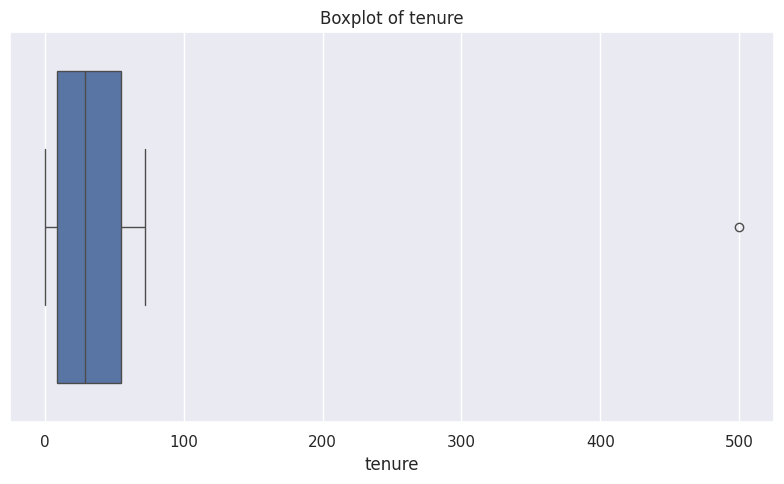

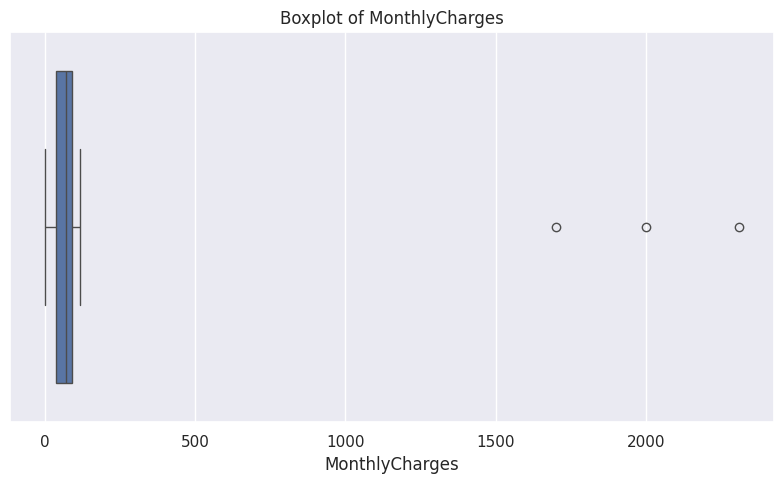

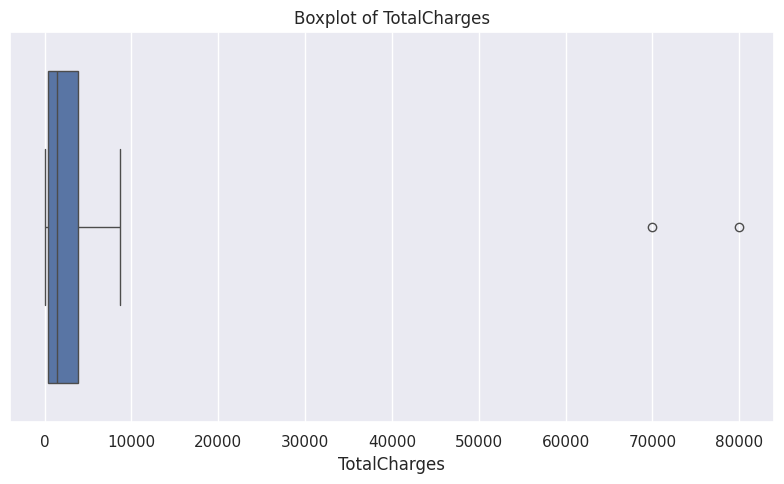

In [ ]:
features_to_process = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in features_to_process:
  plt.figure(figsize=(8,5))
  sns.boxplot(x=df_load[col])
  plt.title(f"Boxplot of {col}")
  plt.tight_layout()
  plt.show()

After identifying the variables containing outliers, the next step is to treat these values by capping them at the minimum and maximum thresholds defined by the Interquartile Range (IQR).

In [ ]:
Q1 = df_load[features_to_process].quantile(0.25)
Q3 = df_load[features_to_process].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
maximum = Q3 + (1.5 * IQR)
print('The maximum value of each features:')
print(maximum)

The maximum value of each features:
tenure             124.00000
MonthlyCharges     169.93125
TotalCharges      8889.13125
dtype: float64


In [ ]:
minimum = Q1 - (1.5 * IQR)
print('The maximum value of each features:')
print(minimum)

The maximum value of each features:
tenure             -60.00000
MonthlyCharges     -43.61875
TotalCharges     -4682.31875
dtype: float64


In [ ]:
more_than = df_load[features_to_process] > maximum
lower_than = df_load[features_to_process] < minimum

df_load[features_to_process] = df_load[features_to_process].mask(more_than, maximum, axis=1)
df_load[features_to_process] = df_load[features_to_process].mask(lower_than, minimum, axis=1)

In [ ]:
print('Distribution of Data Following Outlier Handling:')
df_load[features_to_process].describe()

Distribution of Data Following Outlier Handling:


,tenure,MonthlyCharges,TotalCharges
count,6950.000000,6950.000000,6950.000000
mean,32.423165,64.992201,2286.058750
std,24.581073,30.032040,2265.702553
min,0.000000,0.000000,19.000000
25%,9.000000,36.462500,406.975000
50%,29.000000,70.450000,1400.850000
75%,55.000000,89.850000,3799.837500
max,124.000000,169.931250,8889.131250


###Detecting Non-Standard Values in Categorical Variables
This step aims to identify non-standard values in categorical variables, which are often the result of data entry errors. Inconsistencies in spelling or terminology referring to the same meaning are a common cause. Therefore, a standardization process is necessary to ensure consistency and reliability in the input data.

In [ ]:
cat_features = ['gender', 'SeniorCitizen', 'Partner',
                'Dependents', 'PhoneService', 'MultipleLines',
                'InternetService', 'OnlineSecurity', 'OnlineBackup',
                'DeviceProtection', 'TechSupport', 'StreamingTV',
                'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

for col in cat_features:
  print('\nUnique Values Count Before Standardized Variabel', df_load[col].value_counts())


Unique Values Count Before Standardized Variabel gender
Male         3499
Female       3431
Wanita         14
Laki-Laki       6
Name: count, dtype: int64

Unique Values Count Before Standardized Variabel SeniorCitizen
0    5822
1    1128
Name: count, dtype: int64

Unique Values Count Before Standardized Variabel Partner
No     3591
Yes    3359
Name: count, dtype: int64

Unique Values Count Before Standardized Variabel Dependents
No     4870
Yes    2060
Iya      20
Name: count, dtype: int64

Unique Values Count Before Standardized Variabel PhoneService
Yes    6281
No      669
Name: count, dtype: int64

Unique Values Count Before Standardized Variabel MultipleLines
No                  3346
Yes                 2935
No phone service     669
Name: count, dtype: int64

Unique Values Count Before Standardized Variabel InternetService
Fiber optic    3057
DSL            2388
No             1505
Name: count, dtype: int64

Unique Values Count Before Standardized Variabel OnlineSecurity
No       

After examining the number of unique values for each categorical variable, it was observed that several variables contain non-standard values. These variables include:

- Gender (Female, Male, Wanita, Laki-Laki), which can be standardized to (Female, Male) as they carry the same meaning.

- Dependents (Yes, No, Iya), which can be standardized to (Yes, No) since they refer to the same condition.

- Churn (Yes, No, Churn), which can also be standardized to (Yes, No) because they represent the same status.

- InternetService (Fiber optic, DSL, No), which can be standardized to (Yes, No), where Yes represents an active internet subscription and No indicates none.

The standardization is performed based on the most frequently occurring value (mode) to ensure consistency without altering the underlying meaning of the data.


In [ ]:
df_load = df_load.replace(['Wanita', 'Laki-Laki', 'Churn', 'Iya', "Fiber optic", 'DSL', 'No internet service'],
                          ['Female', 'Male', 'Yes', 'Yes', 'Yes', 'Yes', 'No'])

for col_name in list(['gender','Dependents','Churn']):
  print('\nUnique Values Count After Standardized Variabel', df_load[col_name].value_counts())


Unique Values Count After Standardized Variabel gender
Male      3505
Female    3445
Name: count, dtype: int64

Unique Values Count After Standardized Variabel Dependents
No     4870
Yes    2080
Name: count, dtype: int64

Unique Values Count After Standardized Variabel Churn
No     5114
Yes    1836
Name: count, dtype: int64


###Removing Irrelevant Columns
At this stage, several columns in the dataset were removed. This was done to simplify the data structure, reduce dimensionality, and focus the analysis and modeling efforts on features deemed more relevant or more likely to contribute significantly to prediction outcomes.
The columns removed include:

- `Dependents`
- `MultipleLines`
- `OnlineSecurity`
- `OnlineBackup`
- `DeviceProtection`
- `TechSupport`
- `StreamingMovies`
- `Contract`
- `PaymentMethod`


In [ ]:
df_load = df_load.drop(['Dependents', 'MultipleLines',
                'OnlineSecurity', 'OnlineBackup',
                'DeviceProtection', 'TechSupport',
                'StreamingMovies', 'Contract', 'PaymentMethod'], axis=1)

#Exploratory Data Analysis


###Univariate Analysis
This step aims to visualize the churn data from a univariate perspective, focusing on the percentage of customers who have churned.

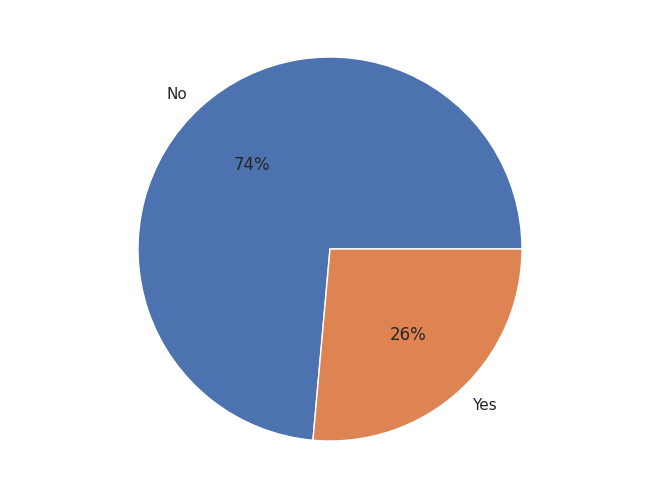

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['No', 'Yes']
churn = df_load.Churn.value_counts()
ax.pie(churn, labels=labels, autopct='%.0f%%')
plt.show()

The pie chart provides a clear visualization of the churn distribution within the dataset. It shows that:

- 74% of customers did not churn (labelled as "No").
- 26% of customers churned (labelled as "Yes").

This indicates that the dataset is imbalanced, with a significantly higher proportion of non-churned customers. Such an imbalance could impact the performance of classification models, potentially causing them to favor the majority class. Therefore, appropriate handling such as applying resampling techniques (Oversampling or undersampling) might be considered during the modeling phase to ensure fair performance across both classes.

###Visualizing the Distribution of Numerical and Categorical Features
**Numerical Features**   
The next step involves selecting numerical and categorical predictor variables and conducting bivariate visualizations to explore their relationship with the target variable (Churn). This analysis aims to identify patterns, trends, or early signals that may be indicative of customer churn behavior.

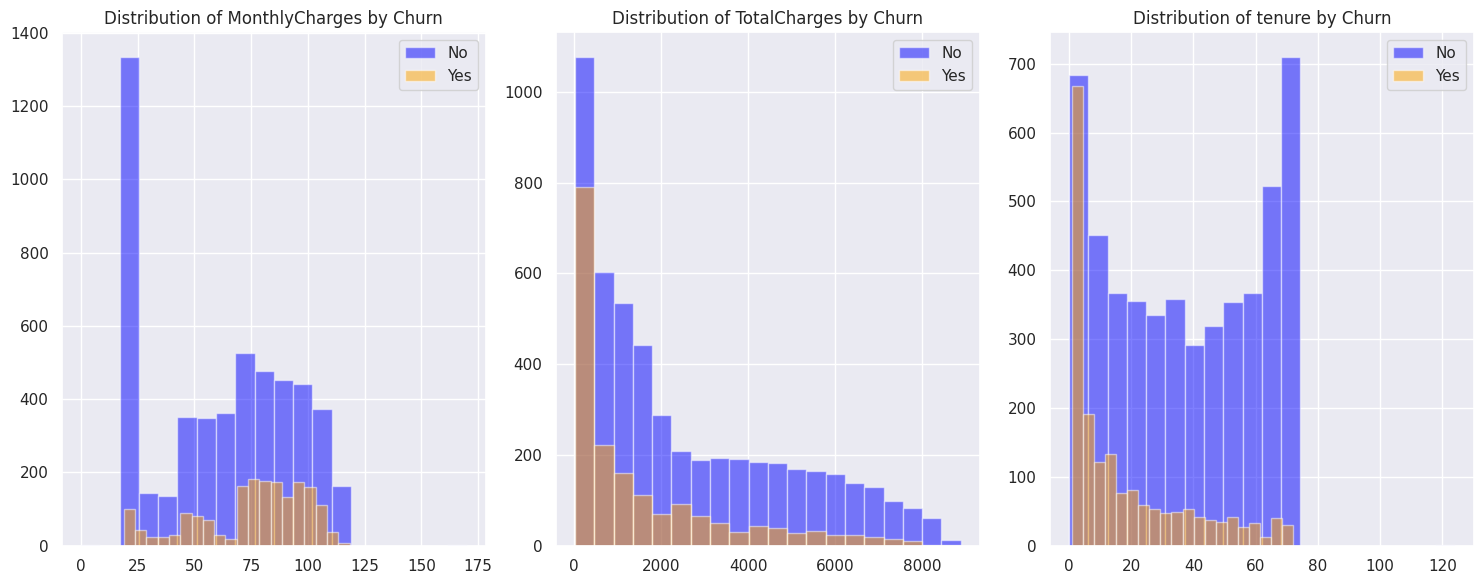

In [ ]:
numerical_features = ['MonthlyCharges', 'TotalCharges', 'tenure']

fig, ax = plt.subplots(1, 3, figsize=(15, 6))
for i, feature in enumerate(numerical_features):
    df_load[df_load.Churn == 'No'][feature].hist(bins=20, color='blue', alpha=0.5, ax=ax[i], label='No')
    df_load[df_load.Churn == 'Yes'][feature].hist(bins=20, color='orange', alpha=0.5, ax=ax[i], label='Yes')
    ax[i].set_title(f'Distribution of {feature} by Churn')
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].legend()

plt.tight_layout()
plt.show()


1. MonthlyCharges (Monthly Fees):
  - Customers with higher monthly charges (particularly above ~60) tend to churn more frequently.

  - Conversely, customers with very low monthly charges are less likely to churn.

2. TotalCharges (Total Fees):
  - Customers with very low total charges (close to 0) show a low risk of churn.

  - However, churn is more prevalent among customers whose total charges fall within the mid-range (approximately 1000–4000), indicating that churn may occur after accumulating a certain level of spending.

3. Tenure (Length of Subscription):
  - New customers (with tenure below ~20 months) have a significantly higher risk of churning.

  - The likelihood of churn decreases substantially as the length of subscription increases; customers with high tenure (above ~60 months) are much more likely to remain loyal.

Customers with high monthly charges and short tenure (i.e., new customers) are at greater risk of churn.
Churn also appears more frequently among customers whose total charges fall within the mid-range.

---

**Categorical Features**  
The next step is to explore the categorical predictor variables through bivariate visualizations, in order to understand the relationship patterns between each feature and the target variable (Churn).

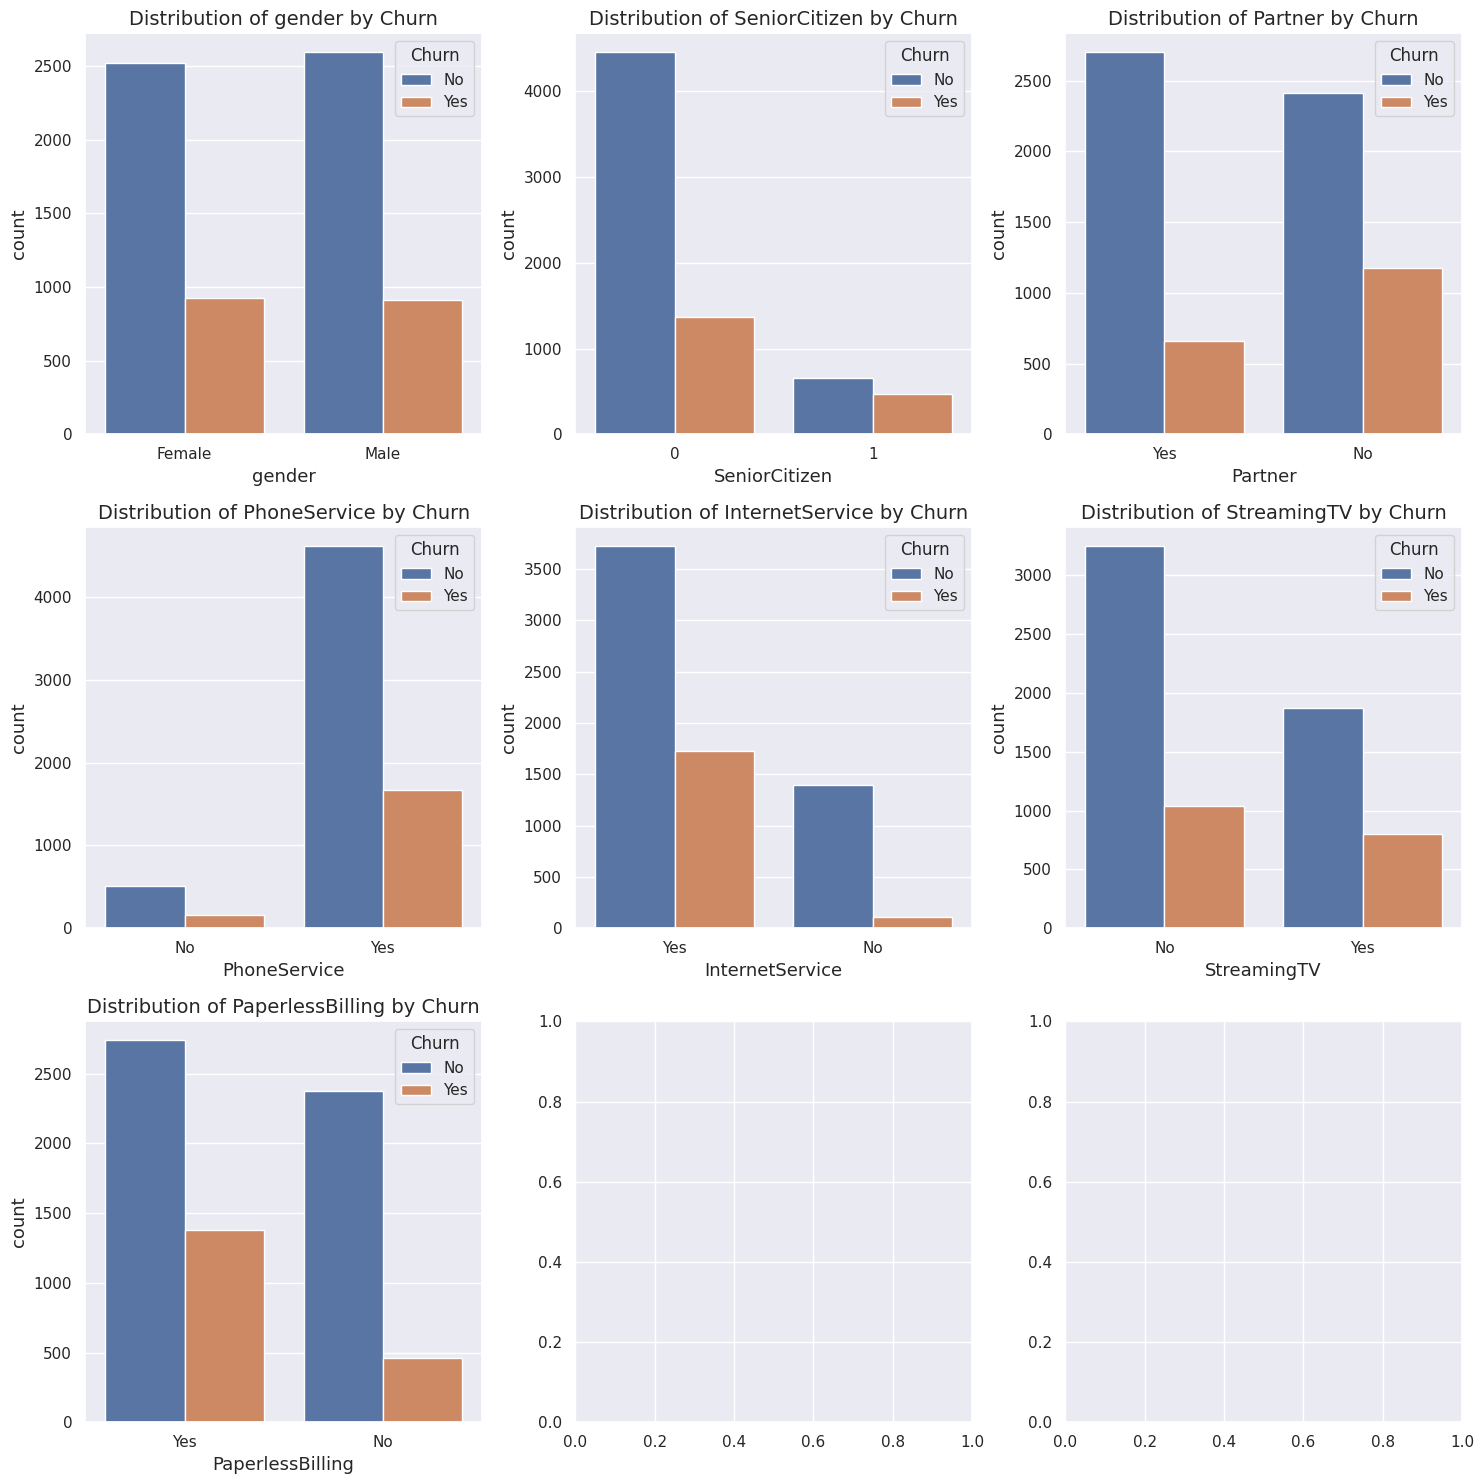

In [ ]:
cat_features = ['gender', 'SeniorCitizen', 'Partner',
                'PhoneService', 'InternetService',
                'StreamingTV', 'PaperlessBilling']

fig, ax = plt.subplots(3, 3, figsize=(15, 15))

for i, feature in enumerate(cat_features):
  sns.countplot(data=df_load, x=feature, hue='Churn', ax=ax[i//3, i%3])
  ax[i//3, i%3].set_title(f'Distribution of {feature} by Churn',fontsize=14)
  ax[i//3, i%3].set_xlabel(feature, fontsize=13)
  ax[i//3, i%3].set_ylabel('count', fontsize=13)

plt.tight_layout()
plt.show()

From the distribution of categorical variables, there appears to be no significant difference in churn behavior based on gender or phone service subscription. However, there is a tendency for customers who churn to be:

- those without a partner (Partner: No),

- senior citizens (SeniorCitizen: Yes),

- users of streaming TV services (StreamingTV: Yes),

- subscribers of internet services (InternetService: Yes),

- and those who use paperless billing (PaperlessBilling: Yes).

#Data PreProcessing

###Removing Unnecessary Columns
After further analysis, it was found that certain columns were not relevant for modeling purposes, specifically `customerID` (customer identification number) and `UpdatedAt` (data collection period). Therefore, these columns were removed from the dataset.

In [ ]:
cleaned_df = df_load.drop(['customerID', 'UpdatedAt'], axis=1)
cleaned_df.head()

,gender,SeniorCitizen,Partner,tenure,PhoneService,InternetService,StreamingTV,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,1.0,No,Yes,No,Yes,29.85,29.85,No
1,Male,0,No,34.0,Yes,Yes,No,No,56.95,1889.50,No
2,Male,0,No,2.0,Yes,Yes,No,Yes,53.85,108.15,Yes
3,Male,0,No,45.0,No,Yes,No,No,42.30,1840.75,No
4,Female,0,No,2.0,Yes,Yes,No,Yes,70.70,151.65,Yes


###Feature Encoding
At this stage, all non-numeric (categorical) features in the `cleaned_df` DataFrame are converted into numeric format using `LabelEncoder`. This process is essential to prepare the data for most machine learning algorithms, which typically require numerical input. Columns that are already numeric are skipped and left unchanged.










In [ ]:
LE = LabelEncoder()

for column in cleaned_df.columns:
  if cleaned_df[column].dtype == np.number : continue
  cleaned_df[column] = LE.fit_transform(cleaned_df[column])

cleaned_df.describe()

,gender,SeniorCitizen,Partner,tenure,PhoneService,InternetService,StreamingTV,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000
mean,0.504317,0.162302,0.483309,32.423165,0.903741,0.783453,0.384317,0.591942,64.992201,2286.058750,0.264173
std,0.500017,0.368754,0.499757,24.581073,0.294967,0.411921,0.486468,0.491509,30.032040,2265.702553,0.440923
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,1.000000,0.000000,0.000000,36.462500,406.975000,0.000000
50%,1.000000,0.000000,0.000000,29.000000,1.000000,1.000000,0.000000,1.000000,70.450000,1400.850000,0.000000
75%,1.000000,0.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3799.837500,1.000000
max,1.000000,1.000000,1.000000,124.000000,1.000000,1.000000,1.000000,1.000000,169.931250,8889.131250,1.000000


###Splitting Dataset
At this stage, the dataset is divided into predictor features (X) and the target variable ('Churn'). Then, the entire dataset is split into two parts: 70% is used for training (X_train, y_train) and 30% for testing (X_test, y_test). The random_state parameter is applied to ensure that the data splitting process is consistent and reproducible every time the code is executed.

In [ ]:
X = cleaned_df.drop('Churn', axis=1)
y = cleaned_df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f'The number of rows and columns in X_train is {X_train.shape}, while the number of rows and columns in y_train is {y_train.shape}')
print('Churn percentage in the training data:')
print(y_train.value_counts(normalize=True))

print(f'\nThe number of rows and columns in X_test is {X_test.shape}, while the number of rows and columns in y_test is {y_test.shape}')
print('Churn percentage in the test data:')
print(y_test.value_counts(normalize=True))


The number of rows and columns in X_train is (4865, 10), while the number of rows and columns in y_train is (4865,)
Churn percentage in the training data:
Churn
0    0.733196
1    0.266804
Name: proportion, dtype: float64

The number of rows and columns in X_test is (2085, 10), while the number of rows and columns in y_test is (2085,)
Churn percentage in the test data:
Churn
0    0.741966
1    0.258034
Name: proportion, dtype: float64


### Handling Class Imbalance with Tomek Links

To address class imbalance, `Tomek Links` is applied to the training data. This undersampling method removes borderline samples from the majority class, helping to clarify class boundaries and reduce noise.

---

Note: Combined resampling techniques such as `SMOTETomek` or `SMOTEENN` can also be used as alternatives when both oversampling and undersampling are needed for better class balance.

In this case, we use `Tomek Links` only as the chosen approach to clean the majority class.

In [ ]:
!pip install imblearn
from imblearn.under_sampling import TomekLinks

tomek_links = TomekLinks()
X_train_tl, y_train_tl = tomek_links.fit_resample(X_train, y_train)

In [ ]:
print("Class distribution before resampling:")
print(y_train.value_counts(normalize=True))

print("\nClass distribution after resampling:")
print(y_train_tl.value_counts(normalize=True))


Class distribution before resampling:
Churn
0    0.733196
1    0.266804
Name: proportion, dtype: float64

Class distribution after resampling:
Churn
0    0.708577
1    0.291423
Name: proportion, dtype: float64


###Feature Scaling for Numerical Variables
To ensure that numerical features contribute equally to the model, we apply standardization using StandardScaler. This scales the features (MonthlyCharges, TotalCharges, and tenure) so they have a mean of 0 and a standard deviation of 1.

The scaler is fitted on the training set (X_train_tl) and then applied to both training and test sets to prevent data leakage.



In [ ]:
numerical_features = ['MonthlyCharges', 'TotalCharges', 'tenure']

scaler = StandardScaler()
X_train_tl[numerical_features] = scaler.fit_transform(X_train_tl[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

#Customer Churn Prediction using Machine Learning
In this stage, several machine learning models are developed and trained to predict customer status (Churn or Not Churn) based on the features available in the dataset. The models built include:

- Logistic Regression

- Random Forest

- Gradient Boosting

- Support Vector Machine (SVM)

Currently, all models are trained using the default parameters of each algorithm.

---
These models will then be evaluated using the following evaluation metrics:

- Accuracy: The overall rate of correct predictions.

- Precision: The accuracy of churn predictions.

- Recall: The model’s ability to detect all churn customers.

- F1-Score: The harmonic mean of precision and recall, particularly useful for imbalanced datasets.



In [ ]:
def evaluation(models:dict[str,object],X_train:pd.DataFrame,X_test:pd.DataFrame,y_train:pd.Series,y_test:pd.Series) -> pd.DataFrame:
    results = []
    for ml_name,ml_func in models.items():
        ml_func.fit(X_train,y_train)
        pred_train      = ml_func.predict(X_train)
        pred_test       = ml_func.predict(X_test)

        train_accuracy = accuracy_score(y_true=y_train, y_pred= pred_train )
        test_accuracy = accuracy_score(y_true=y_test, y_pred=pred_test)
        train_precision = precision_score(y_true=y_train, y_pred= pred_train, average='weighted')
        test_precision = precision_score(y_true=y_test, y_pred=pred_test, average='weighted')
        train_recall = recall_score(y_true=y_train, y_pred= pred_train, average='weighted')
        test_recall = recall_score(y_true=y_test, y_pred=pred_test, average='weighted')
        train_f1 = f1_score(y_true=y_train, y_pred= pred_train, average='weighted')
        test_f1 = f1_score(y_true=y_test, y_pred=pred_test, average='weighted')

        results.append({
            "Model Name": ml_name,
            "Model Function":ml_func,
            "Train Accuracy": train_accuracy,
            "Test Accuracy": test_accuracy,
            "Train Precision": train_precision,
            "Test Precision": test_precision,
            "Train Recall": train_recall,
            "Test Recall": test_recall,
            "F1 Train": train_f1,
            "F1 Test": test_f1
        })
    df_results = pd.DataFrame(results).sort_values(["Test Accuracy", "F1 Test"],ascending=[False,True]).reset_index(drop=True)
    df_results["Rank"] = df_results.index + 1
    return df_results



models = {
    "Logistic Regression":LogisticRegression(random_state=42),
    "Random Forest":RandomForestClassifier(random_state=42),
    "Gradient Boosting":GradientBoostingClassifier(random_state=42),
    "SVM" : SVC(),
}

evaluation_results = evaluation(models, X_train_tl, X_test, y_train_tl, y_test)
evaluation_results

,Model Name,Model Function,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,F1 Train,F1 Test,Rank
0,Gradient Boosting,([DecisionTreeRegressor(criterion='friedman_ms...,0.831388,0.784173,0.826320,0.779237,0.831388,0.784173,0.826395,0.781383,1
1,SVM,SVC(),0.811855,0.778897,0.804835,0.770713,0.811855,0.778897,0.804349,0.773899,2
2,Logistic Regression,LogisticRegression(random_state=42),0.806017,0.777458,0.799846,0.777189,0.806017,0.777458,0.801308,0.777323,3
3,Random Forest,"(DecisionTreeClassifier(max_features='sqrt', r...",0.994836,0.773621,0.994835,0.768893,0.994836,0.773621,0.994836,0.771005,4


- Gradient Boosting is currently the best-performing model based on the highest F1-Test score (0.781) and the highest test accuracy (0.784).

- SVM and Logistic Regression show competitive performance, with F1-Test scores of 0.774 and 0.777 respectively.

- Logistic Regression is the model with the best generalization ability (smallest performance gap) and serves as a strong baseline model.

- Random Forest has slightly lower accuracy and F1-Test score, despite achieving very high performance on the training data (indicating potential overfitting with train accuracy = 0.994).
---
To gain a deeper understanding of each model's capabilities, especially in the context of imbalanced class distribution, further evaluation is highly necessary. This includes analyzing the `classification_report`, which will provide per-class performance metrics (Precision, Recall, F1-score), offering more detailed insights into the model's ability to predict 'No churn' and 'Churn' classes. Furthermore, the `confusion matrix` will be visualized to visually identify the distribution of true positives, true negatives, false positives, and false negatives, which is essential for measuring the impact of classification errors.



In [ ]:
for name, model in models.items():
    print(f"\nClassification Report Testing for {name}:\n")
    print(classification_report(y_test, model.predict(X_test)))


Classification Report Testing for Logistic Regression:

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1547
           1       0.57      0.57      0.57       538

    accuracy                           0.78      2085
   macro avg       0.71      0.71      0.71      2085
weighted avg       0.78      0.78      0.78      2085


Classification Report Testing for Random Forest:

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1547
           1       0.57      0.53      0.55       538

    accuracy                           0.77      2085
   macro avg       0.70      0.69      0.70      2085
weighted avg       0.77      0.77      0.77      2085


Classification Report Testing for Gradient Boosting:

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1547
           1       0.59      0.54      0.57       538

    accuracy       

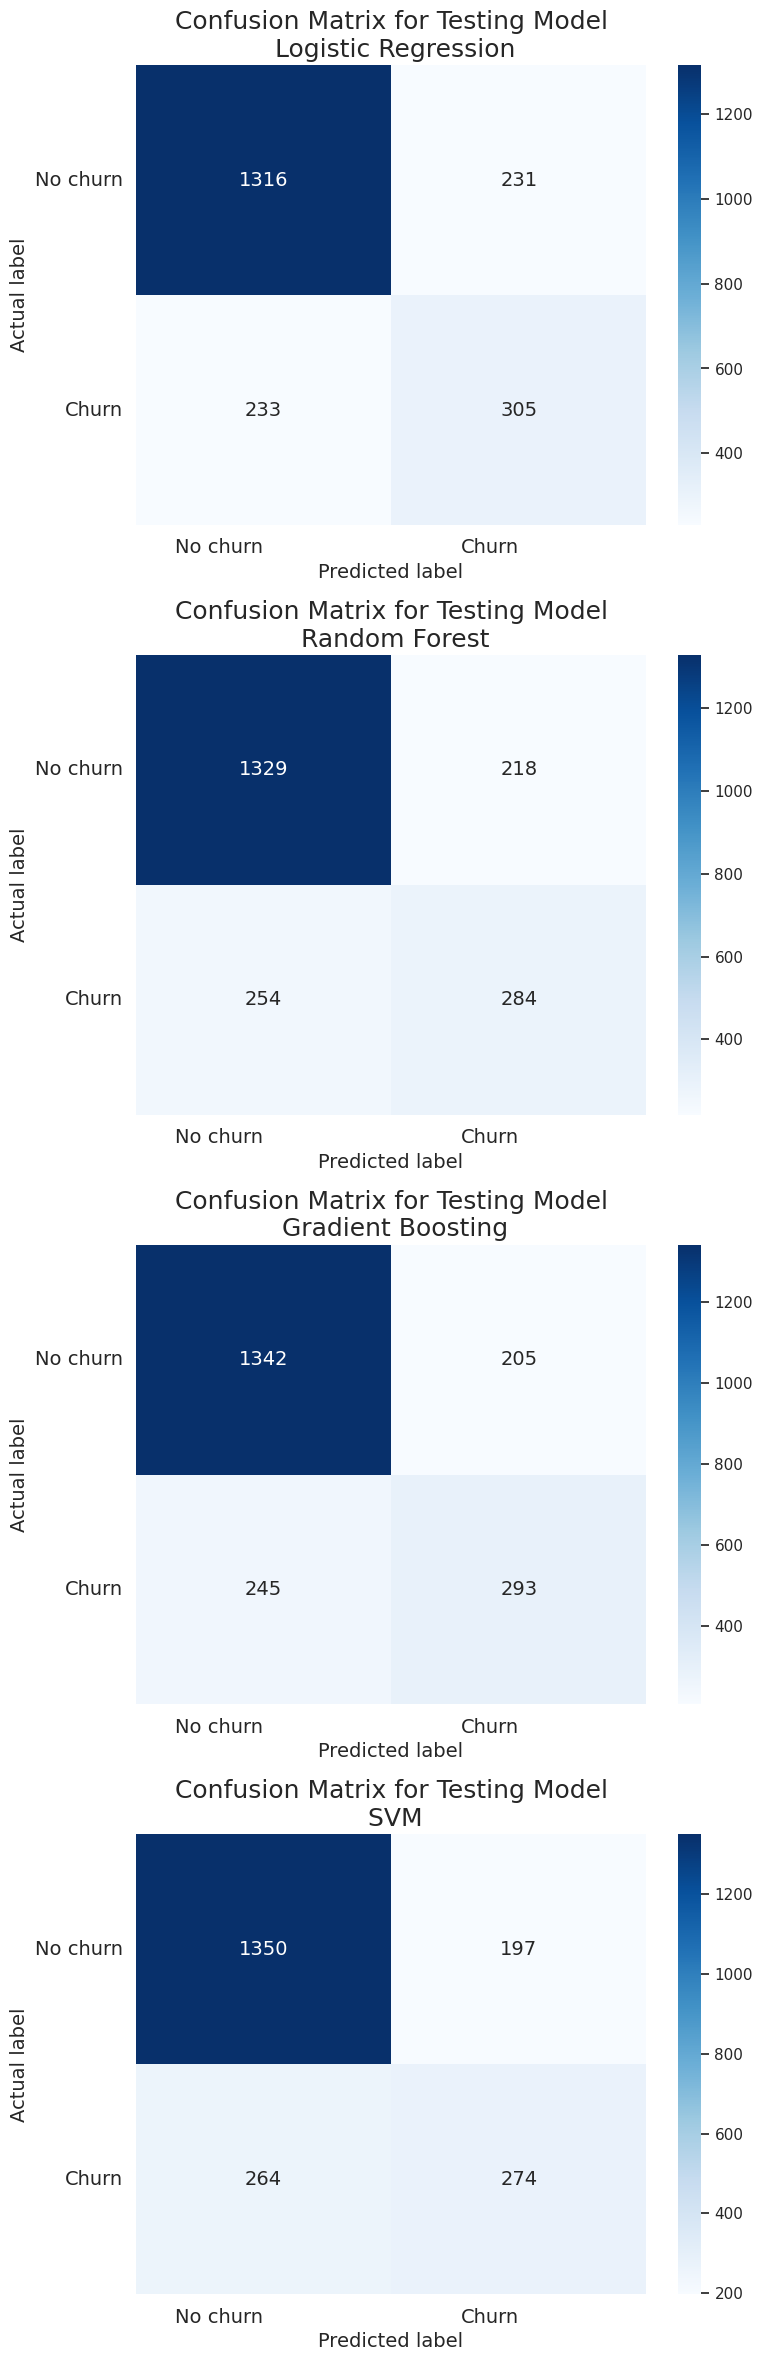

In [ ]:
plt.figure(figsize=(8, 35))
i = 1
for name, model in models.items():
    plt.subplot(6, 1, i)
    model_pred = model.predict(X_test)
    cm = pd.DataFrame(confusion_matrix(y_test, model_pred),
                      ('No churn', 'Churn'),
                      ('No churn', 'Churn')
                      )
    heatmap = sns.heatmap(cm, annot=True, annot_kws={'size': 14}, fmt='d', cmap='Blues')
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

    plt.title(f'Confusion Matrix for Testing Model\n {(name)}', fontsize = 18)
    plt.ylabel('Actual label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14)
    i += 1
plt.tight_layout()
plt.show()

Based on the extended evaluation, the Gradient Boosting algorithm demonstrates relatively higher accuracy compared to other models. However, the achieved accuracy is still not satisfactory enough to be considered an optimal model. Therefore, further evaluation and refinement are necessary.  
Possible improvements include:

-  Hyperparameter optimization using Grid Search or Random Search

- Applying ensemble techniques or stacking

- Exploring additional or advanced feature engineering

- Utilizing combined resampling techniques to handle data imbalance more effectively



<Axes: title={'center': 'Feature Importance'}>

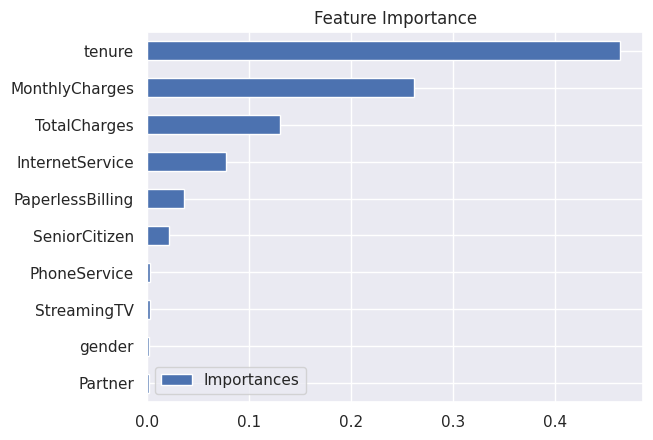

In [ ]:
best_model = evaluation_results[evaluation_results["Rank"]==1]["Model Function"][0]

pd.DataFrame(
    best_model.feature_importances_,
    index=X_train.columns,
    columns=["Importances"]
).sort_values("Importances",ascending=True).plot(kind="barh",title="Feature Importance")

1. **Tenure is the Dominant**   
`tenure` (length of subscription) is the most important factor in the model. This aligns with business intuition: customers who have stayed longer are more likely to be satisfied or loyal, making them less likely to churn.

2. **Monthly Charges and Total Charges**  
`MonthlyCharges` and `TotalCharges` features rank second and third in terms of importance for predicting churn. Customers with high monthly costs may be more sensitive to service quality, while total charges provide an overview of a customer's lifetime value.

3. **Other Features Have Minimal Impact**   
Features such as `InternetService`, `PaperlessBilling`, and `SeniorCitizen` have considerably lower contributions. Features like `gender`, `Partner`, and `StreamingTV` contribute very little to the model’s prediction.

Key Takeaways:  
- Length of subscription (`tenure`) is the most crucial indicator for predicting customer churn.

- Monthly and total charges are also strong predictors, related to perceived value and the customer's ability to pay.

- Demographic factors like gender or partnership status have minimal influence on churn decisions.

Practical Implications:  
- Retention Strategy:  
Focus retention efforts on newer customers or those with shorter tenure, as they are more likely to churn.

- Customer Segmentation:  
High-paying customers may require special attention such as personalized offers or enhanced service to maintain loyalty.

- Model Simplification:  
Features with negligible impact can potentially be removed to create a lighter model, especially useful in real-time applications.